In [ ]:
import os
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import shutil
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

In [ ]:
zip_path = '/content/PCOS.zip'
extract_to = '/content/PCOS'

try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print("Extracted successfully!")
except zipfile.BadZipFile:
    print("Still not a zip file. Try re-zipping or verifying locally.")

In [ ]:
base_dir = '/content/PCOS/PCOS/PCOS'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
infected_dir = os.path.join(base_dir, 'infected')
noninfected_dir = os.path.join(base_dir, 'noninfected')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
infected_images = os.listdir(infected_dir)
noninfected_images = os.listdir(noninfected_dir)

all_images = infected_images + noninfected_images
all_labels = [1] * len(infected_images) + [0] * len(noninfected_images)

# Train Test and Val split

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42, stratify=all_labels
)
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

- Move files
- Data Generators

In [ ]:
def move_files(image_list, label_list, source_dir, target_dir):
    for image, label in zip(image_list, label_list):
        label_dir = 'infected' if label == 1 else 'noninfected'
        source_path = os.path.join(source_dir, label_dir, image)
        target_path = os.path.join(target_dir, label_dir, image)
        os.makedirs(os.path.dirname(target_path), exist_ok=True)
        if os.path.exists(source_path):
            shutil.move(source_path, target_path)

move_files(train_images, train_labels, base_dir, train_dir)
move_files(val_images, val_labels, base_dir, val_dir)
move_files(test_images, test_labels, base_dir, test_dir)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=True
)
val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)

- Class weights

In [ ]:
class_weights = compute_class_weight(
    class_weight='balanced', classes=np.unique(train_labels), y=train_labels
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class Weights: {class_weight_dict}")

# Model
- `Early Stopping`
- `Training`
- `Predict on the validation set`

✅ Extracted successfully!
Found 7541 images belonging to 2 classes.
Found 1886 images belonging to 2 classes.
Found 2357 images belonging to 2 classes.
Class Weights: {0: np.float64(1.17828125), 1: np.float64(0.86857866850956)}
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 121s 465ms/step - accuracy: 0.8604 - loss: 0.2901 - val_accuracy: 0.9878 - val_loss: 0.0554
Epoch 2/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 99s 418ms/step - accuracy: 0.9519 - loss: 0.1193 - val_accuracy: 0.9825 - val_loss: 0.0612
Epoch 3/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 97s 411ms/step - accuracy: 0.9538 - loss: 0.1070 - val_accuracy: 0.9862 - val_loss: 0.0477
Epoch 4/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 96s 407ms/step - accuracy: 0.9635 - loss: 0.0985 - val_accuracy: 0.9852 - val_loss: 0.0486
Epoch 5/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 100s 423ms/step - accuracy: 0.9709 - loss: 0.0828 - val_accuracy: 0.9867 - val_loss: 0.0431
Epoch 6/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 99s 419ms/step - accuracy: 0.9716 - loss: 0.0794 - val_accuracy: 0.9724 - val_loss: 0.0586
Epoch 7/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 97s 412ms/step - accuracy: 0.9727 - loss: 0.0802 - val_accuracy: 0.9883 - val_loss: 0.0285
Epoch 8/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 98s 417ms/step - accuracy: 0.9749 - loss:

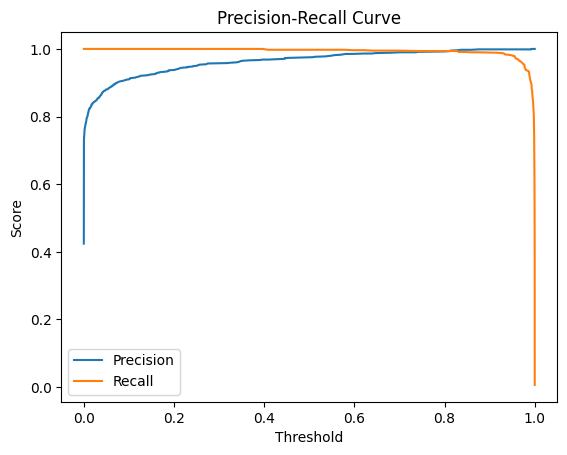

Optimal Threshold: 0.828086256980896


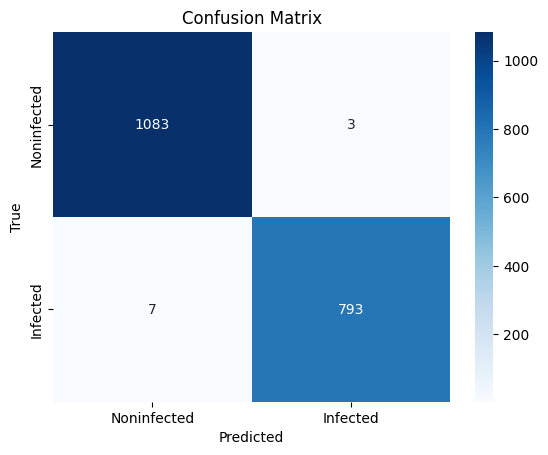

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1086
           1       1.00      0.99      0.99       800

    accuracy                           0.99      1886
   macro avg       0.99      0.99      0.99      1886
weighted avg       0.99      0.99      0.99      1886



In [1]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    class_weight=class_weight_dict,
    callbacks=[early_stop]
)
val_predictions = model.predict(val_generator)
y_true = val_generator.classes

# Metrics and Report

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_true, val_predictions)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal Threshold: {optimal_threshold}")
y_pred = (val_predictions > optimal_threshold).astype(int)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Noninfected', 'Infected'],
            yticklabels=['Noninfected', 'Infected'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_true, y_pred))

In [2]:
test_generator.reset()
test_preds = model.predict(test_generator, verbose=1)
test_preds_binary = (test_preds > optimal_threshold).astype(int).flatten()
test_labels = test_generator.classes
print("Classification Report on Test Set:")
print(classification_report(test_labels, test_preds_binary, target_names=test_generator.class_indices.keys()))
cm = confusion_matrix(test_labels, test_preds_binary)
print("Confusion Matrix:\n", cm)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step
Classification Report on Test Set:
              precision    recall  f1-score   support

    infected       1.00      1.00      1.00      1357
 noninfected       1.00      0.99      0.99      1000

    accuracy                           1.00      2357
   macro avg       1.00      1.00      1.00      2357
weighted avg       1.00      1.00      1.00      2357

Confusion Matrix:
 [[1353    4]
 [   6  994]]


# Save model

In [3]:
model.save('pcos_model.h5')